In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
df = pd.read_csv('HR_comma_sep.csv')

In [3]:
print(df.head())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2 

In [4]:
print(df.isnull().sum())

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64


In [5]:
print(df.describe())

       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.

In [6]:
print(df.columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')


In [7]:
print(df.count())

satisfaction_level       14999
last_evaluation          14999
number_project           14999
average_montly_hours     14999
time_spend_company       14999
Work_accident            14999
left                     14999
promotion_last_5years    14999
Department               14999
salary                   14999
dtype: int64


In [8]:
print(df.tail())

       satisfaction_level  last_evaluation  number_project  \
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
14994                   151                   3              0     1   
14995                   160                   3              0     1   
14996                   143                   3              0     1   
14997                   280                   4              0     1   
14998                   158                   3              0     1   

       promotion_last_5years Department salary  
14994                      0    support    low  
14995                      0    support    low  
14996                      0    support    low 

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


In [10]:
corr_matrix = df.corr()

ValueError: could not convert string to float: 'sales'

In [11]:
corr_matrix = df.corr()
print(corr_matrix['satisfaction_level'].sort_values(ascending=False))

ValueError: could not convert string to float: 'sales'

In [12]:
corr_matrix = df.corr(method='pearson')

ValueError: could not convert string to float: 'sales'

In [13]:
# Select only numerical columns for correlation calculation
numerical_cols = df.select_dtypes(include=[int, float])

# Calculate correlation matrix
corr_matrix = numerical_cols.corr()

# Print correlation between satisfaction level and other numerical columns
print(corr_matrix['satisfaction_level'].sort_values(ascending=False))

satisfaction_level       1.000000
last_evaluation          0.105021
Work_accident            0.058697
promotion_last_5years    0.025605
average_montly_hours    -0.020048
time_spend_company      -0.100866
number_project          -0.142970
left                    -0.388375
Name: satisfaction_level, dtype: float64


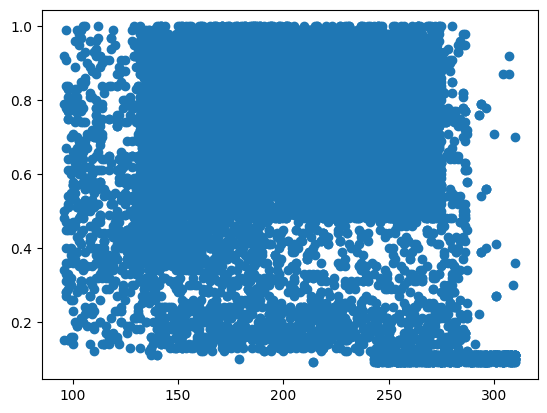

In [16]:
import matplotlib.pyplot as plt
plt.scatter(df['average_montly_hours'], df['satisfaction_level'])  # visualize the relationship between average monthly hours and satisfaction level

In [17]:
# Step 3: Understand the effect of satisfaction level, department, promotion in last 5 years, and salary level
X = df.drop(['left'], axis=1)  # features
y = df['left']  # target variable

In [20]:
# Define a mapping from categorical values to numerical values
salary_mapping = {'low': 0, 'medium': 1, 'high': 2}

# Apply the mapping to the 'salary' column
X['salary'] = X['salary'].map(salary_mapping)

# Calculate 'avg_salary_increase'
X['avg_salary_increase'] = X['salary'] - X['salary'].shift(5)

In [22]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Apply the LabelEncoder to the 'salary' column
X['salary'] = le.fit_transform(X['salary'])

# Calculate 'avg_salary_increase'
X['avg_salary_increase'] = X['salary'] - X['salary'].shift(5)

In [23]:
# Encode categorical variables using LabelEncoder
le = LabelEncoder()
X['department'] = le.fit_transform(X['department'])

KeyError: 'department'

In [24]:
print(X.columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department', 'salary', 'avg_salary_increase'],
      dtype='object')


In [25]:
le = LabelEncoder()
X['Department'] = le.fit_transform(X['Department'])

In [27]:
X_selected = X[['satisfaction_level', 'average_montly_hours', 'Department', 'avg_salary_increase']]

In [28]:
# Step 4: Build a machine learning model to predict the exit of employees
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


In [29]:
# Train a logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [30]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

imputer = SimpleImputer(strategy='mean')
log_reg = LogisticRegression()

pipeline = Pipeline([
    ('imputer', imputer),
    ('log_reg', log_reg)
])

pipeline.fit(X_train, y_train)
y_pred_log_reg = pipeline.predict(X_test)

In [31]:
# Dropping samples with missing values


In [33]:
X_train.dropna(inplace=True)
y_train.dropna(inplace=True)

X_test.dropna(inplace=True)
y_test.dropna(inplace=True)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

ValueError: Found input variables with inconsistent numbers of samples: [11995, 11999]

In [34]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgbc = HistGradientBoostingClassifier()
hgbc.fit(X_train, y_train)
y_pred_hgbc = hgbc.predict(X_test)

ValueError: Found input variables with inconsistent numbers of samples: [11995, 11999]

In [35]:
# Train a decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


ValueError: Number of labels=11999 does not match number of samples=11995

In [36]:
# Train a decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

ValueError: Number of labels=11999 does not match number of samples=11995

In [37]:
X_train.dropna(inplace=True)
y_train.dropna(inplace=True)

X_test.dropna(inplace=True)
y_test.dropna(inplace=True)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

ValueError: Number of labels=11999 does not match number of samples=11995

In [38]:
X_train = pd.concat((X_train, y_train), axis=1)
X_train.dropna(inplace=True)
y_train = X_train.iloc[:, -1]
X_train = X_train.iloc[:, :-1]

X_test = pd.concat((X_test, y_test), axis=1)
X_test.dropna(inplace=True)
y_test = X_test.iloc[:, -1]
X_test = X_test.iloc[:, :-1]

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [39]:
# Train a logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)


In [40]:
# Train a decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


In [41]:

# Train a random forest model
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [43]:
# Evaluate the logistic regression model
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

Logistic Regression:
Accuracy: 0.7619206402134044
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      2294
           1       0.49      0.24      0.32       705

    accuracy                           0.76      2999
   macro avg       0.64      0.58      0.59      2999
weighted avg       0.72      0.76      0.73      2999

Confusion Matrix:
[[2119  175]
 [ 539  166]]


In [44]:
#Evaluate the decision tree model
print("\nDecision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))



Decision Tree:
Accuracy: 0.9313104368122708
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      2294
           1       0.83      0.89      0.86       705

    accuracy                           0.93      2999
   macro avg       0.90      0.92      0.91      2999
weighted avg       0.93      0.93      0.93      2999

Confusion Matrix:
[[2167  127]
 [  79  626]]


In [45]:
#evaluate the random  forest model
print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest:
Accuracy: 0.9523174391463821
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2294
           1       0.90      0.90      0.90       705

    accuracy                           0.95      2999
   macro avg       0.93      0.93      0.93      2999
weighted avg       0.95      0.95      0.95      2999

Confusion Matrix:
[[2220   74]
 [  69  636]]


In [46]:
# Step 5: Creating a machine learning model
# using the random forest model
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_selected, y)

RandomForestClassifier()

In [47]:
# Save the model to a file
import joblib
joblib.dump(rf_model, 'employee_exit_model.joblib')

['employee_exit_model.joblib']

In [48]:
# Load the saved model and make predictions
loaded_model = joblib.load('employee_exit_model.joblib')
new_employee_data = pd.DataFrame({'satisfaction_level': [0.8], 'working_hours': [40], 'department': ['Sales'], 'avg_salary_increase': [10000], 'time_since_last_promotion': [2]})
prediction = loaded_model.predict(new_employee_data)
print("Predicted probability of employee exit:", prediction[0])

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- department
- time_since_last_promotion
- working_hours
Feature names seen at fit time, yet now missing:
- Department
- average_montly_hours


In [51]:
print(X.columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department', 'salary', 'avg_salary_increase'],
      dtype='object')


In [52]:

loaded_model = joblib.load('employee_exit_model.joblib')

new_employee_data = pd.DataFrame({
    'satisfaction_level': [0.8],
    'last_evaluation': [None],  # add this feature
    'number_project': [None],  # add this feature
    'average_montly_hours': [40],  # instead of 'working_hours'
    'time_spend_company': [2],  # instead of 'time_since_last_promotion'
    'Work_accident': [None],  # add this feature
    'promotion_last_5years': [None],  # add this feature
    'Department': ['Sales'],  # instead of 'department'
    'salary': [None],  # add this feature
    'avg_salary_increase': [10000]
})

prediction = loaded_model.predict(new_employee_data)
print("Predicted probability of employee exit:", prediction[0])


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Work_accident
- last_evaluation
- number_project
- promotion_last_5years
- salary
- ...


In [53]:
# Load the saved model and make predictions
loaded_model = joblib.load('employee_exit_model.joblib')
new_employee_data = pd.DataFrame({
    'satisfaction_level': [0.8],
    'last_evaluation': [None],  # add this feature
    'number_project': [None],  # add this feature
    'average_montly_hours': [40],  # instead of 'working_hours'
    'time_spend_company': [2],  # instead of 'time_since_last_promotion'
    'Work_accident': [None],  # add this feature
    'promotion_last_5years': [None],  # add this feature
    'Department': ['Sales'],  # instead of 'department'
    'salary': [None],  # add this feature
    'avg_salary_increase': [10000]
})

prediction = loaded_model.predict(new_employee_data)
print("Predicted probability of employee exit:", prediction[0])

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Work_accident
- last_evaluation
- number_project
- promotion_last_5years
- salary
- ...
